<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad4/Practica_1_PCA_Frutas_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 4

### Practica 1: **Análisis de Componentes Principales (PCA)**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________


## **Análisis de Componentes Principales (PCA)**

### **Reducción de Dimensionalidad mediante PCA**

El PCA (Principal Component Analysis), o Análisis de Componentes Principales, **es una técnica de reducción de dimensionalidad muy utilizada en Machine Learning**, especialmente en preprocesamiento, visualización y extracción de características.

PCA es un método matemático que **transforma un conjunto de variables originales** (por ejemplo, mass, width, height, color_score) **en un nuevo conjunto de variables** llamadas componentes principales.

Estos componentes:
* Son combinaciones lineales de las variables originales.
* Capturan la máxima varianza posible.
* Están ordenados:
  * Componente 1 (PC1) → contiene la mayor variabilidad
  * Componente 2 (PC2) → la segunda mayor variabilidad
  * …  
* Son ortogonales (independientes entre sí).

#### **Ejemplo rápido aplicado al dataset frutas**

Variables originales:
* mass
* width
* height
* color_score  

Después de PCA → 2 componentes:
* PC1 podría representar “Tamaño” (relación entre mass, width, height)
* PC2 podría representar “Color / forma”  

Y luego estos 2 componentes se usan para:
* graficar los clusters
* entrenar K-Means más eficientemente


| Propósito                        | ¿Qué aporta PCA?                           |
| -------------------------------- | ------------------------------------------ |
| Reducir dimensiones              | Más velocidad, menos ruido                 |
| Visualización                    | Permite graficar en 2D/3D datasets grandes |
| Preprocesamiento para clustering | Mejora separación y estabilidad            |
| Extraer patrones                 | Encuentra factores escondidos              |
| Evitar redundancia               | Quita variables correlacionadas            |


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
frutas = pd.read_csv("frutas.csv")
# Exploración rápida
frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# Variables numéricas
features = ["mass", "width", "height", "color_score"]
X = frutas[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Inicializar PCA y especificar el número de componentes principales deseados**

In [5]:
pca = PCA(n_components=2)  # Elegimos 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente

explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))


Proporción de varianza explicada por cada componente: [0.57845054 0.25650171]
Varianza explicada acumulada: [0.57845054 0.83495225]


### **Interpretacion de los componentes**

* El primer componente principal **(PC1)** explica aproximadamente el **57.84%** de la variabilidad total de los datos. Esto significa que poco más de la mitas de la información en las variables originales puede representarse mediante este componente.
* El segundo componente principal **(PC2)** explica alrededor del **25.65%** de la información. Este segundo componente captura información adicional no explicada por el primero, pero en menor medida.
* En resúmen, **con solo 2 componentes se está preservando el 83.49% de la información**.
* **En PCA, conservar más del 75% ya es considerado excelente para visualización y clustering.**

Esto significa:

✔ El dataset se puede representar muy bien en 2D.    
✔ La estructura natural de los datos no se pierde.  
✔ Los clusters que se encuentren serán representativos.  

## **Coeficientes de las variables**

* Los coeficientes sirven para interpretar completamente los componentes principales y entender qué mide cada uno.


In [7]:
# Coeficientes de las variables
componentes = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("Contribución de variables a cada componente:")
print(componentes)

Contribución de variables a cada componente:
         mass     width    height  color_score
PC1  0.626413  0.577999  0.496267    -0.165052
PC2  0.195381  0.254802 -0.238567     0.916509


### **Interpretación de los coeficientes**

**Variables con mayor influencia Componente PC1:**
* mass: 0.626
* width: 0.578
* height: 0.496

Todas tienen valores altos y similares.

**¿Qué significa?**
* PC1 representa el tamaño general de la fruta
(frutas grandes vs frutas pequeñas).  

**Porque:**
* Las variables físicas (masa, ancho, altura) tienen pesos altos y positivos.
* Color_score tiene un peso pequeño y negativo, es decir, prácticamente no influye.

**Variables con mayor influencia Componente PC2:**  

* color_score: 0.9165 (dominante)
* Otros pesos son pequeños en comparación.  

**¿Qué significa?**

* PC2 representa el color (intensidad, madurez) de la fruta


## **¿Cómo saber cuántos componentes son ideales? (gráfica)**

El método estándar se llama gráfica de codo (Scree Plot).  
La idea es:
* Graficar la varianza explicada de cada componente.
* Escoger los componentes antes del “codo”.  

**El “codo” se identifica donde la pendiente cambia drásticamente**, es decir, donde agregar más componentes ya no aporta información significativa.





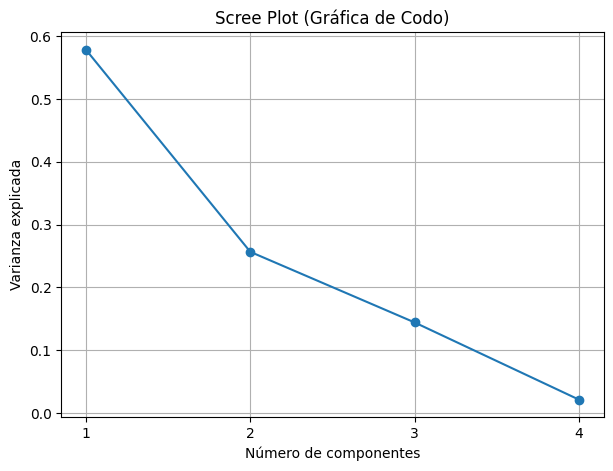

Varianza por componente: [0.57845054 0.25650171 0.14402362 0.02102413]
Varianza acumulada: [0.57845054 0.83495225 0.97897587 1.        ]


In [19]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(7,5))
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    pca_full.explained_variance_ratio_,
    marker='o'
)
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.title("Scree Plot (Gráfica de Codo)")
plt.grid(True)
plt.show()

print("Varianza por componente:", pca_full.explained_variance_ratio_)
print("Varianza acumulada:", pca_full.explained_variance_ratio_.cumsum())



### **Interpretación**

* En la gráfica el codo ocurre entre: PC2 y PC3.
* Si sumamos: PC1: 58% y PC2: 26% Obtenemos: 84% de la varianza explicada. Esto confirma que 2 componentes son ideales.
* el componente PC3 solo agrega ≈ 14% más.
* PC4 agrega solo ≈2%, es decir, prácticamente ruido

## **Gráfica Biplot**

Un biplot es una gráfica que combina dos tipos de información al mismo tiempo.

**Scores (puntos)**
* Representan a las observaciones proyectadas en los componentes principales (por ejemplo PC1 y PC2).
* Sirven para ver:
  * similitudes entre datos
  * agrupamientos
  * separaciones naturales

**Loadings (vectores)**
* Representan a las variables originales como flechas.
Sirven para ver:
* qué variables influyen más en cada componente
* la dirección de esa influencia
* qué variables están correlacionadas entre sí

**Que información obtenemos con un Biplot?**
* Si los vectores son largos → variables con alta varianza, aportan mucho al PCA.
* Si dos vectores están cerca → variables correlacionadas.
* Si un punto cae en la dirección de una flecha → esa observación tiene un valor alto en esa variable.
* Si un punto cae en dirección opuesta → valor bajo en esa variable.
* Variables muy correlacionadas → flechas apuntan casi al mismo lugar.

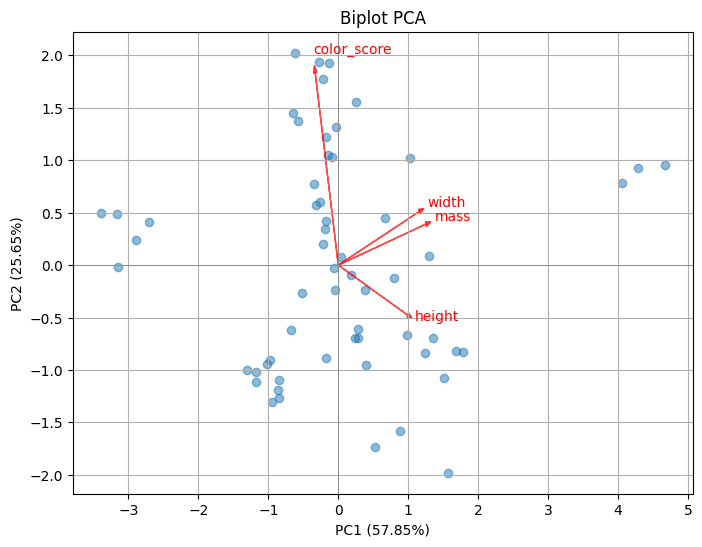

In [15]:
pca = PCA(n_components=2)  # Definimos el PCA con 2 componentes
components = pca.fit_transform(X_scaled)   # Calcular el PCA

# Los loadings son los vectores que indican cuánto contribuye cada variable original a cada componente.
# Es una matriz donde: las filas = componentes principales y las columnas = variables con
# valores = coeficientes de contribución
# Si lo transpones (.T), pasan a: filas = variables,  columnas = componentes

loadings = pca.components_.T    # loadings (vectores)
variables = X.columns   # Guarda los nombres de las variables originales,
# por ejemplo ['mass', 'width', 'height', 'color_score']

plt.figure(figsize=(8,6))

# Graficar puntos (scores)
plt.scatter(components[:,0], components[:,1], alpha=0.5)

# Etiquetas de ejes
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

# Graficar vectores (loadings)
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              loadings[i,0]*2,   # escala del vector
              loadings[i,1]*2,
              color='red',
              alpha=0.7,
              head_width=0.05)

    plt.text(loadings[i,0]*2.2,
             loadings[i,1]*2.2,
             var, color='red')

plt.title("Biplot PCA")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()



### **Interpretación**
* Puntos azules representan las frutas proyectadas en los componentes principales
* Flechas rojas representan las variables originales (mass, width, height, color_score)
* Longitud de la flecha representan cuánta influencia tiene la variable
* Dirección de la flecha representan hacia dónde aumenta esa variable
* Ángulo entre flechas → relación entre variables (correlación).  

#### **Interpretación de las Flechas (Variables)**
* **color_score**
  * La flecha está casi completamente vertical hacia arriba.
  * Se relaciona fuertemente con PC2.
  * Muy poca relación con PC1.
  * Indica que color_score captura información distinta a las otras variables.
* **mass y width**
  * Las flechas están muy alineadas, apuntando hacia la derecha diagonal.
  * Están altamente correlacionadas entre sí.
  * Ambas contribuyen fuertemente a PC1 (57.85% de varianza).
* **height**
  * La flecha apunta hacia abajo y un poco a la derecha.
  * Está correlacionada parcialmente con mass/width.
  * Pero tiene un componente propio que aporta información diferente.  

#### **Interpretación de los puntos (observaciones)**

Los puntos representan las frutas proyectadas en PC1 y PC2.

* **Hacia la derecha (PC1 alto)**  
  * = frutas con mayor anchura y masa
Probablemente manzanas grandes o cítricos más pesados.

* **Hacia arriba (PC2 alto)**  
  * = frutas con puntajes de color_score altos
Frutas más “coloridas” o maduras.

* **Hacia abajo**  
  * = frutas altas pero menos coloridas.